# Importing the corpus


In [1]:
import pickle
from collections import Counter
from googletrans import Translator  # Import Translator module from googletrans package
import _dynet as dy

train_data = pickle.load(open("train_data.pkl", "rb"))
test_data = pickle.load(open("test_data.pkl", "rb"))
val_data = pickle.load(open("val_data.pkl", "rb"))

In [2]:
def createCorpus():
    corpus_fr=[]
    corpus_en=[]
    puncList = [".",";",":","!","?","/","\\",",","#","@","$","&",")","(","\"","..."]
    i=0
    with open ("train_fr.fr", "r",encoding="utf8") as myfile:
        for line in myfile:
            sentence=[]
            for word in line.split(" "):
                word=word.replace("\n","")
                if(word not in puncList):
                    if word.replace('.','',1).isdigit():
                        word="DIG"
                    sentence.append(word) 
            corpus_fr.append(sentence)



    with open ("train_en.en", "r",encoding="utf8") as myfile:
        for line in myfile:
            sentence=[]
            for word in line.split(" "):
                word=word.replace("\n","")
                if(word not in puncList):
                    if word.replace('.','',1).isdigit():
                        word="DIG"
                    sentence.append(word) 
            corpus_en.append(sentence)

    with open('corpus_en.pkl', 'wb') as f:
        pickle.dump(corpus_en, f)
    with open('corpus_fr.pkl', 'wb') as f:
        pickle.dump(corpus_fr, f)
    
    return corpus_en, corpus_fr

In [3]:
#corpus_en, corpus_fr = createCorpus()
corpus_en = pickle.load(open("corpus_en.pkl", "rb"))
corpus_fr = pickle.load(open("corpus_fr.pkl", "rb"))

In [4]:
len(corpus_en) == len(corpus_fr)

True

# Building the dictionary for word2Vec

In [5]:
from gensim.models import word2vec

In [6]:
def createW2V():
    model_en=word2vec.Word2Vec(corpus_en,min_count=1)
    model_fr=word2vec.Word2Vec(corpus_fr,min_count=1)

    with open('model_en.pkl', 'wb') as f:
        pickle.dump(model_en, f)
    with open('model_fr.pkl', 'wb') as f:
        pickle.dump(model_fr, f)
    
    return model_en, model_fr

In [7]:
# model_en, model_fr = createW2V()
model_en = pickle.load(open("model_en.pkl", "rb"))
model_fr = pickle.load(open("model_fr.pkl", "rb"))

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [9]:
X_fr = model_fr[model_fr.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [10]:
X_en = model_en[model_en.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# PCA and Visualization

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result_fr_pca = pca.fit_transform(X_fr)

In [12]:
pca = PCA(n_components=2)
result_en_pca = pca.fit_transform(X_en)

un
deux
trois
quatre
cinq
six
sept


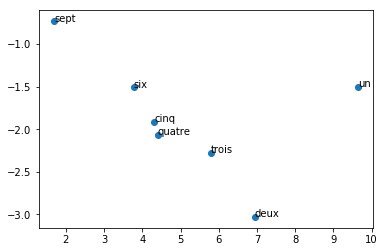

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#FRENCH
# create a scatter plot of the projection
index_fr=[list(model_fr.wv.vocab).index("un"),list(model_fr.wv.vocab).index("deux"),list(model_fr.wv.vocab).index("trois"),list(model_fr.wv.vocab).index("quatre"),list(model_fr.wv.vocab).index("cinq"),list(model_fr.wv.vocab).index("six"),list(model_fr.wv.vocab).index("sept")]
result_fr=np.array([result_fr_pca[i] for i in index_fr])
plt.scatter(-result_fr[:, 0],-result_fr[:, 1])
fr_words = [ list(model_fr.wv.vocab)[i] for i in index_fr]
for i, word in enumerate(fr_words):
    print(word)
    plt.annotate(word, xy=(-result_fr[i, 0], -result_fr[i, 1]))
plt.show()

one
two
three
four
five
six
seven


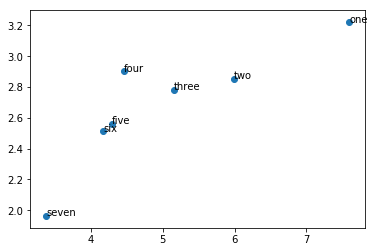

In [14]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en.wv.vocab).index("one"),list(model_en.wv.vocab).index("two"),list(model_en.wv.vocab).index("three"),list(model_en.wv.vocab).index("four"),list(model_en.wv.vocab).index("five"),list(model_en.wv.vocab).index("six"),list(model_en.wv.vocab).index("seven")]
result_en=np.array([result_en_pca[i] for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
plt.show()

# Reducing Objective Function

In [15]:
all_word = []
english_vocab = set()
for sentence in corpus_en:
    for word in sentence:
        all_word.append(word)
        english_vocab.add(word)
        
french_vocab = set()
for sentence in corpus_fr:
    for word in sentence:
        french_vocab.add(word)
        
counts = Counter(all_word)
common_vocab = set()
train_vocab = set()
for word in counts.most_common(70000):
    common_vocab.add(word[0])
for word in counts.most_common(10000):
    train_vocab.add(word[0])

# Create Pairs of English-French Tuples

In [16]:
def generateWordPairs():
    word_pairs = []
    word_pairs_smaller = []

    count = 0
    for word in english_vocab:
        print(count)
        count += 1
        translator = Translator()
        french_word = translator.translate(word,src="en",dest="fr").text
        if french_word in french_vocab:
            word_pairs.append((word, french_word))
            if french_word != word:
                word_pairs_smaller.append((word, french_word))

    with open('word_pairs.pkl', 'wb') as f:
        pickle.dump(word_pairs, f)
    with open('word_pairs_smaller.pkl', 'wb') as f:
        pickle.dump(word_pairs_smaller, f)
    
    return word_pairs, word_pairs_smaller

In [17]:
# word_pairs, word_pairs_smaller = generateWordPairs()
word_pairs = pickle.load(open("word_pairs.pkl", "rb"))
# word_pairs_smaller = pickle.load(open("word_pairs_smaller.pkl", "rb"))

# Least Square Method of Solving Transormation Matrix on 2D data

In [18]:
def generateMat(size, dimm):
    en_list = list(model_en.wv.vocab)
    fr_list = list(model_fr.wv.vocab)

    A = np.zeros((dimm*size, dimm*dimm))
    b = np.zeros((dimm*size, 1))

    count = 0
    inds = np.random.choice(len(word_pairs),size=size,replace=False)
    for i in range(len(inds)):
        word_pair = word_pairs[inds[i]]
        word_en = word_pair[0]
        word_fr = word_pair[1]
#         en_emb = X_en[en_list.index(word_en)]
#         fr_emb = X_fr[fr_list.index(word_fr)]
        en_emb = result_en_pca[en_list.index(word_en)]
        fr_emb = result_fr_pca[fr_list.index(word_fr)]
        
        for j in range(dimm):
            A[i*dimm+j,j*dimm:(j+1)*dimm] = en_emb
            b[i*dimm+j] = fr_emb[j]
        
        if count % 100 == 0:
            print(count)
        count += 1

    A_trans = np.transpose(A)
    coef = np.dot(np.dot(np.linalg.inv(np.dot(A_trans, A)), A_trans), b)

    transform_mat = coef.reshape((dimm,dimm))
    

    return transform_mat

In [ ]:
mat = generateMat(1000,2)

In [ ]:
def transform(emb):
    out_emb = np.dot(mat, emb.reshape((len(emb),1)))
    return out_emb.flatten()

In [ ]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en.wv.vocab).index("one"),list(model_en.wv.vocab).index("two"),list(model_en.wv.vocab).index("three"),list(model_en.wv.vocab).index("four"),list(model_en.wv.vocab).index("five"),list(model_en.wv.vocab).index("six"),list(model_en.wv.vocab).index("seven")]
result_en=np.array([transform(result_en_pca[i]) for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
# plt.show()

index_fr=[list(model_fr.wv.vocab).index("un"),list(model_fr.wv.vocab).index("deux"),list(model_fr.wv.vocab).index("trois"),list(model_fr.wv.vocab).index("quatre"),list(model_fr.wv.vocab).index("cinq"),list(model_fr.wv.vocab).index("six"),list(model_fr.wv.vocab).index("sept")]
result_fr=np.array([result_fr_pca[i] for i in index_fr])
plt.scatter(result_fr[:, 0],result_fr[:, 1])
fr_words = [ list(model_fr.wv.vocab)[i] for i in index_fr]
for i, word in enumerate(fr_words):
    print(word)
    plt.annotate(word, xy=(result_fr[i, 0], result_fr[i, 1]))
plt.show()

In [ ]:
word_arr = np.array(list(model_fr.wv.vocab))
en_list = list(model_en.wv.vocab)
def predict_2d(word_en,topWords):
    en_emb = result_en_pca[en_list.index(word_en)]
    translator = Translator()
    french_word = translator.translate(word_en,src="en",dest="fr").text
    return list(word_arr[np.argsort(np.sum((result_fr_pca - transform(en_emb)) ** 2,axis=1))[:topWords]]), french_word

In [ ]:
predict_2d('porch',5)

# Dynet Method of solving N-DIMM transformation matrix

In [27]:
en_list = list(model_en.wv.vocab)
fr_list = list(model_fr.wv.vocab)

In [ ]:
def generateTransormMatOriginal():
    
    DIMM = X_en.shape[1]

    dyparams = dy.DynetParams()
    dyparams.set_mem(2048)
    dyparams.set_autobatch(True)
    dyparams.init()

    # create a parameter collection and add the parameters.
    m = dy.ParameterCollection()
    pW = m.add_parameters((DIMM,DIMM))
    pb = m.add_parameters((DIMM))

    dy.renew_cg() # new computation graph. not strictly needed here, but good practice.

    # associate the parameters with cg Expressions
    W = dy.parameter(pW)
    b = dy.parameter(pb)

    x = dy.vecInput(DIMM) # an input vector of size 2. Also an expression.
    y = dy.vecInput(DIMM)
    output = W*x

    SIZE = len(word_pairs)

    trainer = dy.SimpleSGDTrainer(m)

    EPOCHS = 5

    for epoch in range(EPOCHS):
        inds = np.random.choice(len(word_pairs),size=SIZE,replace=False)
        total_loss = 0
        seen_instances = 0
        for i in range(len(inds)):
            word_pair = word_pairs[inds[i]]
            word_en = word_pair[0]
            word_fr = word_pair[1]
            en_emb = X_en[en_list.index(word_en)]
            fr_emb = X_fr[fr_list.index(word_fr)]

            x.set(en_emb)
            y.set(fr_emb)

            loss = dy.squared_distance(output,y)
            seen_instances += 1
            total_loss += loss.value()
            loss.backward()
            trainer.update()
            if (seen_instances > 1 and seen_instances % 1000 == 0):
                print ("average loss is:",total_loss / seen_instances)
                seen_instances = 0
                total_loss = 0

    mat = W.value()

    with open('mat.pkl', 'wb') as f:
        pickle.dump(mat, f)
    
    return mat

In [50]:
# mat = generateTransormMatOriginal()
mat = pickle.load(open("mat.pkl", "rb"))

# Improved Method  -----This is the method for generating transformation matrix

In [37]:
DIMM = X_en.shape[1]
HIDDEN = 1000

In [45]:
def generateTransormMatImproved():
    
#     training_tuples = pickle.load(open("training_tuples.pkl", "rb"))

    dyparams = dy.DynetParams()
    dyparams.set_mem(2048)
    dyparams.set_autobatch(True)
    dyparams.init()

    # create a parameter collection and add the parameters.
    m = dy.ParameterCollection()
    pW = m.add_parameters((DIMM,DIMM))
    pb = m.add_parameters((HIDDEN))
    pC = m.add_parameters((DIMM,HIDDEN))

    dy.renew_cg() # new computation graph. not strictly needed here, but good practice.

    # associate the parameters with cg Expressions
    W = dy.parameter(pW)
    b = dy.parameter(pb)
    C = dy.parameter(pC)

    x = dy.vecInput(DIMM) # an input vector of size 2. Also an expression.
    y = dy.vecInput(DIMM)
#     output = C*(W*x + b)
    output = W*x
    
    SIZE = 10000

    trainer = dy.SimpleSGDTrainer(m)

    en_list = list(model_en.wv.vocab)
    fr_list = list(model_fr.wv.vocab)


    EPOCHS = 1

#     words = np.random.choice(list(common_vocab),size=SIZE,replace=False)
    for epoch in range(EPOCHS):
        total_loss = 0
        seen_instances = 0
        for i,tup in enumerate(train_data):
            word_en = tup[0]
            word_fr = tup[1]
#             translator = Translator()
#             word_fr = translator.translate(word_en,src="en",dest="fr").text
#             if word_fr not in french_vocab:
#                 continue
                
#             training_tuples.add((word_en,word_fr))
            
            en_emb = X_en[en_list.index(word_en)]
            fr_emb = X_fr[fr_list.index(word_fr)]

            en_emb /= np.linalg.norm(en_emb)
            fr_emb /= np.linalg.norm(fr_emb)

            x.set(en_emb)
            y.set(fr_emb)
        
#             loss = 1 - dy.dot_product(output,y) / (dy.l2_norm(output) * dy.l2_norm(y)).value()
            
            loss = dy.squared_distance(output,y)
        
            seen_instances += 1
            total_loss += loss.value()
            
            
            loss.backward()
            trainer.update()
            
#             tmp = W.value()
#             u, s, vh = np.linalg.svd(tmp, full_matrices=True)
#             newW = np.dot(u,vh)
            
#             pW = m.add_parameters((DIMM,DIMM),init=dy.NumpyInitializer(newW))
#             W = dy.parameter(pW)

            
            if i % 100 == 0:
                print(total_loss / seen_instances)
                print(i)

    mat = W.value()
    matC = C.value()
    matB = b.value()
    
#     with open('training_tuples.pkl', 'wb') as f:
#         pickle.dump(training_tuples, f)
    
    return mat, matC, matB

In [46]:
mat, C, b = generateTransormMatImproved()

1.8117375373840332
0
1.2877212851354392
100
1.162362343488048
200
1.111530193557771
300
1.0413392929364915
400
0.9966268046887335
500
0.9671682212098862
600
0.9419510087341113
700
0.9199089260025417
800
0.9012849886429296
900
0.8907075647737358
1000
0.8769615410432071
1100
0.8668877320250901
1200
0.8530014375944855
1300
0.8469731006066685
1400
0.838802314604782
1500
0.8305554540082114
1600
0.8238396509509448
1700
0.8182656447931106
1800
0.8154986946285555
1900
0.8128306388199658
2000
0.8063207268431208
2100
0.8009383315283946
2200
0.7980274280378581
2300
0.7930324847054749
2400
0.7888070308580631
2500
0.7852260759361704
2600
0.7812668652898159
2700
0.7770073503383522
2800
0.7736934510254523
2900
0.7712253461834273
3000
0.7682628065097797
3100
0.7640565080322053
3200
0.7617445690357046
3300
0.7599647255924932
3400
0.7578497931544218
3500
0.7559446340690087
3600
0.7546360856075603
3700
0.7516831772848356
3800
0.7502658167876393
3900
0.7473742898197002
4000
0.7476726502463515
4100
0.74667

# Better Prediction Method -- this is the prediction method using transformation matrix

In [47]:
word_arr = np.array(list(model_fr.wv.vocab))
X_fr_mag = np.sum(X_fr**2,axis=1)**0.5
def predict_cosineSim(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
#     out = (np.dot(C,(np.dot(mat,en_emb.reshape((DIMM,1))) + np.array(b).reshape((HIDDEN,1))))).flatten()
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
#     translator = Translator()
#     french_word = translator.translate(word_en,src="en",dest="fr").text
    
    out_mag = np.sum(out**2)**0.5
    cos_sim = np.sum((X_fr * out),axis=1)/(X_fr_mag*out_mag)
    return list(word_arr[np.argsort(cos_sim)[::-1][:topWords]])#, french_word

In [51]:
predict_cosineSim('chocolate',5)

['agrumes', 'biscuits', 'gâteaux', 'sauces', 'saucisses']

In [52]:
mat

array([[ 0.05856398, -0.01891301,  0.14371952, ...,  0.02430679,
         0.06067046,  0.02653935],
       [ 0.03369197,  0.06212052,  0.04053268, ...,  0.09182187,
         0.03907124, -0.03148458],
       [-0.13856173,  0.06481858,  0.0767872 , ..., -0.08383739,
        -0.01502783, -0.07328853],
       ...,
       [ 0.02980525, -0.01074789, -0.03619723, ..., -0.04663319,
         0.05263432, -0.00372449],
       [-0.01757441, -0.06776521,  0.06201397, ..., -0.04451933,
         0.10012314, -0.01414686],
       [-0.00498244,  0.0764556 ,  0.09849447, ...,  0.03067609,
         0.01351042,  0.03287015]])

# Worse Prediction Method -- ignore this

In [ ]:
word_arr = np.array(list(model_fr.wv.vocab))
def predict_closest(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
#     translator = Translator()
#     french_word = translator.translate(word_en,src="en",dest="fr").text
    
    return list(word_arr[np.argsort(np.sum((X_fr - out) ** 2,axis=1))[:topWords]])#, french_word

In [ ]:
predict_closest('chocolate',5)

# Accuracy of Model -- running this gets the accuracy

In [53]:
test_sample = np.random.choice(list(train_vocab),size=3000,replace=False)

num_correct = 0
num_incorrect = 0

# test_tuple = pickle.load(open("test_tuple.pkl", "rb"))

for i, tup in enumerate(val_data):
    print(i)
    if i == 300:
        break
    
    word = tup[0]
    french_word = tup[1]
    
#     translator = Translator()
#     french_word = translator.translate(word,src="en",dest="fr").text
#     if french_word not in french_vocab or word == french_word or word[0].isupper():
#         continue
    output_list = predict_cosineSim(word,20)
    output_set = set(output_list)
    
#     test_tuple.add((word,french_word))
#     print(i)
    
    if french_word in output_set:
        num_correct += 1
        print('CORRECT:  ' + word)
    else:
#         flag = False
#         for word_fr in output_list:
#             if translator.translate(word_fr,src="fr",dest="en").text == word:
#                 num_correct += 1
#                 print('CORRECT:  ' + word)
#                 flag = True
#                 break
#         if not flag:
        num_incorrect += 1
        print('INCORRECT:  ' + word)

# with open('test_tuple.pkl', 'wb') as f:
#     pickle.dump(test_tuple, f)

acc = num_correct / (num_correct + num_incorrect)
print(acc)

0
INCORRECT:  pretext
1
INCORRECT:  junction
2
INCORRECT:  salad
3
INCORRECT:  enable
4
INCORRECT:  basically
5
CORRECT:  and
6
INCORRECT:  collateral
7
CORRECT:  sexuality
8
INCORRECT:  reservations
9
INCORRECT:  region
10
CORRECT:  cancelled
11
CORRECT:  frequently
12
CORRECT:  minority
13
INCORRECT:  requests
14
INCORRECT:  topic
15
INCORRECT:  motion
16
CORRECT:  width
17
CORRECT:  delivery
18
CORRECT:  sensitive
19
CORRECT:  teaching
20
CORRECT:  beautifully
21
INCORRECT:  juvenile
22
INCORRECT:  investigate
23
CORRECT:  button
24
INCORRECT:  working
25
INCORRECT:  voter
26
INCORRECT:  specific
27
INCORRECT:  little
28
CORRECT:  painful
29
INCORRECT:  corridor
30
CORRECT:  dry
31
INCORRECT:  associates
32
INCORRECT:  mighty
33
INCORRECT:  emerging
34
INCORRECT:  return
35
INCORRECT:  evidence
36
CORRECT:  elder
37
INCORRECT:  showing
38
CORRECT:  liberation
39
INCORRECT:  bowl
40
INCORRECT:  sharp
41
CORRECT:  transportation
42
INCORRECT:  trips
43
CORRECT:  age
44
CORRECT:  neutr

In [ ]:
# 46.33% -- Accuracy achieved with part 1's transformation matrix
# 47% -- baseline, with normalization

# 43% -- 500
# 44% -- 1000